kNN Classification

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Import the dataset

In [2]:
dataset = pd.read_csv('games.csv')
X = dataset.iloc[:, [0,1]].values
y = dataset.iloc[:, 4].values


### Visualize dataset
The data represents statistical properties of a set of images of banknotes. Some images are labeled *1 (genuine)* or *0 (false)*

In [3]:
dataset

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,True,1.499791e+12,1.499791e+12,24,resign,white,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2
20054,WSJDhbPl,True,1.499698e+12,1.499699e+12,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2
20055,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3
20056,b0v4tRyF,True,1.499696e+12,1.499697e+12,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4


### Split the dataset into the Training set and Test set

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Since the target is to classify games based on 'winner', we'll use this column as our target variable
target = 'winner'

# Selecting the features for the classification. 
# For simplicity, we'll initially select numerical columns only.
features = dataset.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Removing 'created_at' and 'last_move_at' as they are timestamps and might not be relevant for classification
features.remove('created_at')
features.remove('last_move_at')

# Defining the feature dataset (X) and target dataset (y)
X = dataset[features]
y = dataset[target]

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Displaying the shapes of the training and test sets
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape


((16046, 4), (4012, 4), (16046,), (4012,))

### Scale the training and testing sets

### Run the kNN classifier and fit the classifier to the Training set

In [8]:
from sklearn.neighbors import KNeighborsClassifier

# Creating the kNN classifier. We'll start with k=5, a common default choice.
knn = KNeighborsClassifier(n_neighbors=5)

# Fitting the classifier to the training data
knn.fit(X_train_scaled, y_train)

# The classifier is now trained and ready for making predictions or evaluating its performance.
"Classifier has been trained successfully."


'Classifier has been trained successfully.'

### Make classification predictions on the testing set

In [9]:
# Making classification predictions on the test set
y_pred = knn.predict(X_test_scaled)

# Displaying the first few predictions
y_pred[:10]


array(['white', 'white', 'white', 'black', 'white', 'black', 'white',
       'black', 'black', 'draw'], dtype=object)

### Create the confusion matrix

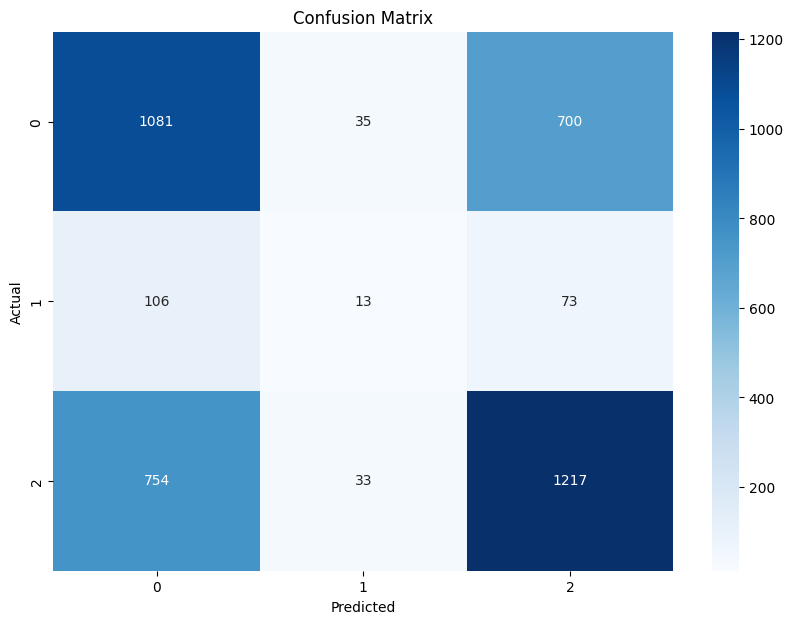

In [10]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Visualize the Training set results

In [12]:
from matplotlib.colors import ListedColormap
from sklearn.base import ClassifierMixin
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, ClassifierMixin.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Testing set)')
plt.xlabel('Variance')
plt.ylabel('Skewness')
plt.legend()
plt.show()


InvalidIndexError: (slice(None, None, None), 0)

### Visualize the testing set results